<a href="https://colab.research.google.com/github/oshmita26/Automatic-number-plate-recognition-with-PaddleOCR/blob/main/Vehicle_number_plate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'

In [ ]:
!kaggle datasets download -d aslanahmedov/number-plate-detection

 99% 410M/413M [00:05<00:00, 89.8MB/s]
100% 413M/413M [00:05<00:00, 78.0MB/s]


In [ ]:
!unzip /content/number-plate-detection.zip

Archive:  /content/number-plate-detection.zip
  inflating: TEST/TEST.jpeg          
  inflating: TEST/TEST.mp4           
  inflating: data.yaml               
  inflating: images/N1.jpeg          
  inflating: images/N1.xml           
  inflating: images/N100.jpeg        
  inflating: images/N100.xml         
  inflating: images/N101.jpeg        
  inflating: images/N101.xml         
  inflating: images/N102.jpeg        
  inflating: images/N102.xml         
  inflating: images/N103.jpeg        
  inflating: images/N103.xml         
  inflating: images/N104.jpeg        
  inflating: images/N104.xml         
  inflating: images/N105.jpeg        
  inflating: images/N105.xml         
  inflating: images/N106.jpeg        
  inflating: images/N106.xml         
  inflating: images/N107.jpeg        
  inflating: images/N107.xml         
  inflating: images/N108.jpeg        
  inflating: images/N108.xml         
  inflating: images/N109.jpeg        
  inflating: images/N109.xml         
  in

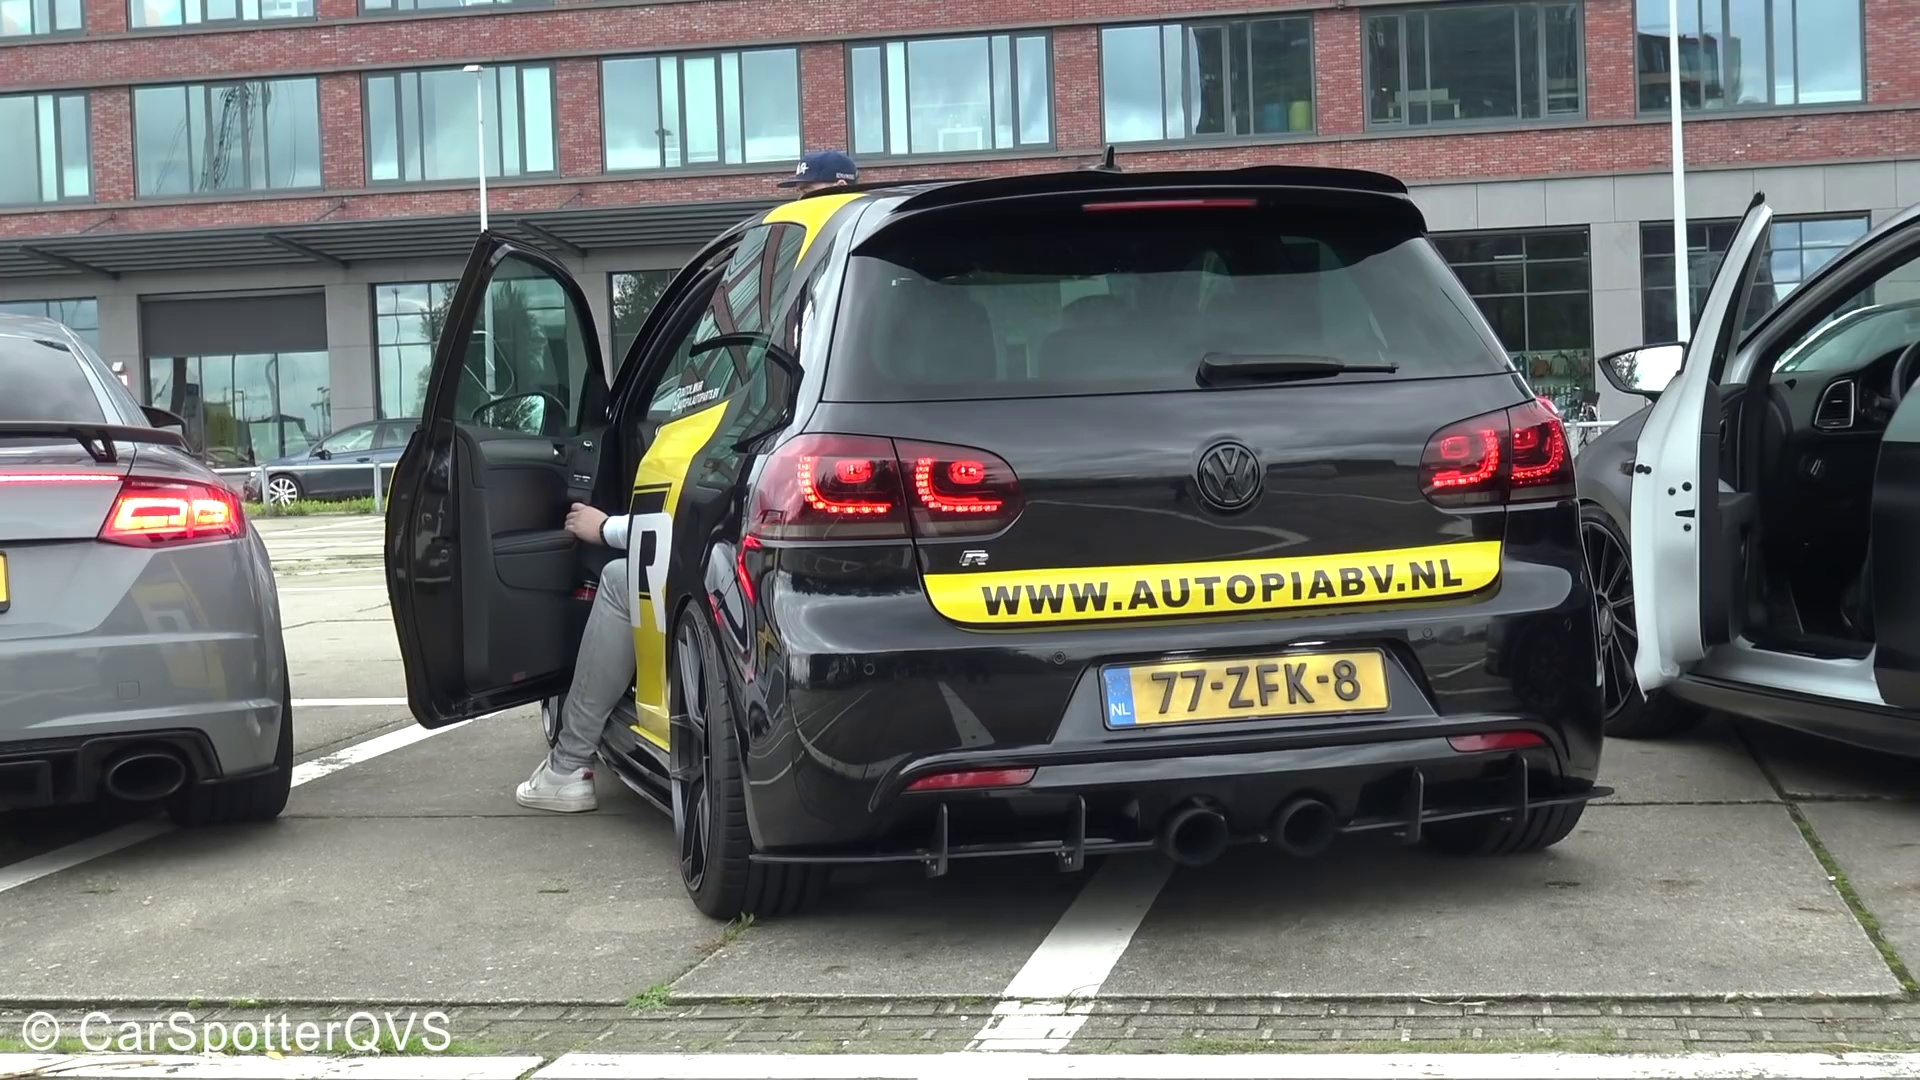

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('/content/images/N1.jpeg')
img

### PPOCR installation and import

In [ ]:
!pip install paddlepaddle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.9.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, b

In [ ]:
!pip install "paddleocr>=2.0.6"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

## Image preprocessing and number plate localisation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image
## draw result method
from PIL import ImageDraw, Image, ImageFont
## Making the necessary imports
import cv2
from google.colab.patches import cv2_imshow
import os
import time
import numpy as np

In [ ]:
## First finding the number of files in the images folder
import glob
myPath = '/content/images'
jpegCounter = len(glob.glob1(myPath,"*.jpeg"))
xmlCounter = len(glob.glob1(myPath,"*.xml"))
# lst = os.listdir(directory) # your directory path
# number_files = len(lst)
print(jpegCounter)
print(xmlCounter)

228
225


In [ ]:
## Bounding box annotations for the license plates are given for the cars in the xml files
## However, 3 are missing
## What if the bounding boxes were not given? Then we would have to apply contour edge detection for automatically
## detecting a bounding box

In [ ]:
from skimage.segmentation import clear_border

In [ ]:
# filen = "hdjjddhgj.jpeg"
# ## modify the string
# new_filename = filen.split('.')[0] + "_roi." + filen.split('.')[1]

# print(new_filename)

In [ ]:
!pwd

/content


In [ ]:
!mkdir new_image_folder

In [ ]:
import xml.etree.ElementTree as ET
from os import listdir
myPath = '/content/images'
directed_path = '/content/new_image_folder'

for filename in os.listdir(myPath):
  extracted_data = []
  if filename.endswith('.xml'):
    des_path = myPath+'/'+filename
    # print(des_path)
    tree = ET.parse(des_path)
    # Get the root element of the XML tree
    root = tree.getroot()
    bndbox_elements = root.findall('.//bndbox')
    # Extract characters within <bndbox> elements
    for bndbox in bndbox_elements:
        # Iterate over the child elements of <bndbox>
        for child in bndbox:
            # Extract the characters or data from the child elements
            extracted_data.append(child.text)

    img_filename = des_path.replace('.xml', '.jpeg')
    img_orig = cv2.imread(img_filename)

    gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

    # Print the extracted characters or data
    xmin, ymin, xmax, ymax = map(int, extracted_data)

    # Draw the bounding box rectangle
    cv2.rectangle(gray, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)


    licensePlate = gray[ymin:ymax, xmin:xmax]
    roi = cv2.threshold(licensePlate, 0, 255,
      cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    roi = clear_border(roi)
    # cv2_imshow(licensePlate)
    # cv2_imshow(roi)
    new_filename = (directed_path + '/'+ filename.split('.')[0] + "_roi." + filename.split('.')[1]).replace('.xml', '.jpeg')
    # print(new_filename)
    cv2.imwrite(new_filename, roi)


In [ ]:
len(glob.glob1('/content/new_image_folder',"*.jpeg"))

225

## Training with PPOCR

In [ ]:
## FIRST doing it for a single image
sample_path = '/content/new_image_folder/N1_roi.jpeg'
ocr = PaddleOCR(use_angle_cls=True, lang='en')
result = ocr.ocr(sample_path, cls=True)
result = result[0]
print(result)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 236kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:08<00:00, 1.23MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 139kiB/s]

[2023/05/31 18:16:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

[2023/05/31 18:17:00] ppocr DEBUG: dt_boxes num : 1, elapse : 0.06559467315673828
[2023/05/31 18:17:00] ppocr DEBUG: cls num  : 1, elapse : 0.014682769775390625
[2023/05/31 18:17:00] ppocr DEBUG: rec_res num  : 1, elapse : 0.11135196685791016
[[[[57.0, 27.0], [267.0, 13.0], [272.0, 55.0], [61.0, 69.0]], ('77-ZFK-8', 0.9980714321136475)]]


## Fine-tuning the PPOCR model with Data Augmentation and Transfer Learning

In [ ]:
## Making a separate directory for the augumented folder path
!mkdir aug_image_folder

In [ ]:
# ## Data Augmentation at first
# import os
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# from PIL import Image

# folder_path = '/content/images'
# datagen = ImageDataGenerator(
#     rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#     shear_range=0.2,  # randomly apply shearing transformations
#     zoom_range=0.2,  # randomly zooms in on images
#     horizontal_flip=True,  # randomly flip images horizontally
#     fill_mode='nearest'  # fill in newly created pixels
# )
# dest_path = '/content/aug_image_folder'
# for filename in os.listdir(folder_path):
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         img_path = os.path.join(folder_path, filename)
#         img = Image.open(img_path) # Load the image
#         x = np.asarray(img) # convert image to numpy array
#         x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)
#         # x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)

#         # Generate augmented images and save them
#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=dest_path, save_prefix='aug', save_format='jpeg'):
#           i += 1
#           if i >= 5:
#               break
#           augmented_image = Image.fromarray(batch[0].astype(np.uint8))
#           augmented_image.save(os.path.join(dest_path, f'augmented_{filename}_{i}.jpeg'))

In [ ]:
!pwd

/content


In [ ]:
!mkdir colored_img_folder

In [ ]:
## Colored folder path
myPath = '/content/images'
directed_path = '/content/colored_img_folder'
for filename in os.listdir(myPath):
  extracted_data = []
  if filename.endswith('.xml'):
    des_path = myPath+'/'+filename
    # print(des_path)
    tree = ET.parse(des_path)
    # Get the root element of the XML tree
    root = tree.getroot()
    bndbox_elements = root.findall('.//bndbox')
    # Extract characters within <bndbox> elements
    for bndbox in bndbox_elements:
        # Iterate over the child elements of <bndbox>
        for child in bndbox:
            # Extract the characters or data from the child elements
            extracted_data.append(child.text)

    img_filename = des_path.replace('.xml', '.jpeg')
    img_orig = cv2.imread(img_filename)

    # gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

    #Print the extracted characters or data
    xmin, ymin, xmax, ymax = map(int, extracted_data)

    # Draw the bounding box rectangle
    cv2.rectangle(img_orig, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)


    roi = img_orig[ymin:ymax, xmin:xmax]
    # # roi = cv2.threshold(licensePlate, 0, 255,
    # #   cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # roi = clear_border(licensePlate)
    # # cv2_imshow(licensePlate)
    # # cv2_imshow(roi)
    new_filename = (directed_path + '/'+ filename.split('.')[0] + "_roi." + filename.split('.')[1]).replace('.xml', '.jpeg')
    # print(new_filename)
    cv2.imwrite(new_filename, roi)

In [ ]:
!mkdir final_aug_dataset

In [ ]:
## Data Augmentation at final
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

folder_path = '/content/colored_img_folder'
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooms in on images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # fill in newly created pixels
)
dest_path = '/content/final_aug_dataset'
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path) # Load the image
        x = np.asarray(img) # convert image to numpy array
        x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)
        # x = x.reshape((1,) + x.shape)  # reshape to (1, height, width, channels)

        # Generate augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=dest_path, save_prefix='aug', save_format='jpeg'):
          i += 1
          if i >= 3:
              break
          augmented_image = Image.fromarray(batch[0].astype(np.uint8))
          augmented_image.save(os.path.join(dest_path, f'augmented_{filename}_{i}.jpeg'))

In [ ]:
len(glob.glob1('/content/final_aug_dataset',"*.jpeg"))

1106

## Uploading the folder to google drive to use it directly for the next step

In [ ]:
!pip install pydrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
# Authenticate and create a PyDrive client
gauth = GoogleAuth()
# gauth.LocalWebserverAuth()  # Use webserver flow for authentication
drive = GoogleDrive(gauth)

In [ ]:
## Successfully performed data_augmentation with 1106 images
## I'm uploading this folder to my google drive so that I can access the dataset automatically from the drive
## without having to create it once again

def upload_folder(folder_path, parent_folder_id=None):
    folder_name = os.path.basename(folder_path)

    folder_metadata = {
        'title': folder_name,
        'mimeType': 'application/vnd.google-apps.folder'
    }

    if parent_folder_id:
        folder_metadata['parents'] = [{'id': parent_folder_id}]

    folder = drive.CreateFile(folder_metadata)
    folder.Upload()

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if os.path.isdir(file_path):
            upload_folder(file_path, parent_folder_id=folder['id'])
        else:
            file = drive.CreateFile({'title': filename, 'parents': [{'id': folder['id']}]})
            file.SetContentFile(file_path)
            file.Upload()

    print(f"Uploaded folder '{folder_name}' to Google Drive.")


In [ ]:
folder_path = '/content/final_aug_dataset'
upload_folder(folder_path)

Uploaded folder 'final_aug_dataset' to Google Drive.


In [ ]:
import shutil
shutil.make_archive('/content/final_aug_dataset', 'zip', 'final_aug_dataset')

'/content/final_aug_dataset.zip'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1DjzsX7trhU--RAt6WENj2UcDPYIF6aRs


In [ ]:
# import tensorflow as tf
# PATH = '/content/new_image_folder'
# train_dir = os.path.join(PATH, 'train')
# validation_dir = os.path.join(PATH, 'validation')

# BATCH_SIZE = 32
# IMG_SIZE = (160, 160)

# train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)